In [60]:
from tensorflow.keras.applications.vgg16 import VGG16
import tensorflow.keras.backend as K
import tensorflow as tf


In [61]:
tf.compat.v1.disable_eager_execution()

In [62]:
model = VGG16(weights='imagenet')


In [63]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
# The local path to our target image
# img_path = './creative_commons_elephant.jpg'
img_path = './elephant2.jpg'
# `img` is a PIL image of size 224x224
img = image.load_img(img_path, target_size=(224, 224))
# `x` is a float32 Numpy array of shape (224, 224, 3)
x = image.img_to_array(img)
# We add a dimension to transform our array into a "batch"
# of size (1, 224, 224, 3)
x = np.expand_dims(x, axis=0)
# Finally we preprocess the batch
# (this does channel-wise color normalization)
x = preprocess_input(x)

In [64]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])
 
np.argmax(preds[0])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Predicted: [('n02504013', 'Indian_elephant', 0.35956523), ('n02504458', 'African_elephant', 0.30063093), ('n02437312', 'Arabian_camel', 0.2288755)]


385

In [56]:
african_elephant_output = model.output[:, 386]
last_conv_layer = model.get_layer('block5_conv3')
grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value, axis=-1)

In [57]:
import matplotlib.pyplot as plt

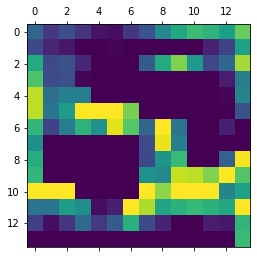

In [58]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap, 0)
plt.matshow(heatmap)

In [59]:
import cv2
img = cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap * 0.4 + img
# cv2.imwrite('./elephant_cam2.jpg', superimposed_img)
cv2.imwrite('./elephant_cam3.jpg', superimposed_img)

True